You should consider upgrading via the '/home/jan/miniconda3/envs/ppda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37636 entries, 0 to 37635
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Application number                            37636 non-null  object 
 1   Date submitted                                37634 non-null  object 
 2   Date closed                                   37634 non-null  object 
 3   Student                                       37636 non-null  object 
 4   Mode of study                                 37636 non-null  object 
 5   Level of study (I - Engineering, M - Master)  37636 non-null  object 
 6   Language                                      37636 non-null  object 
 7   Specialization           

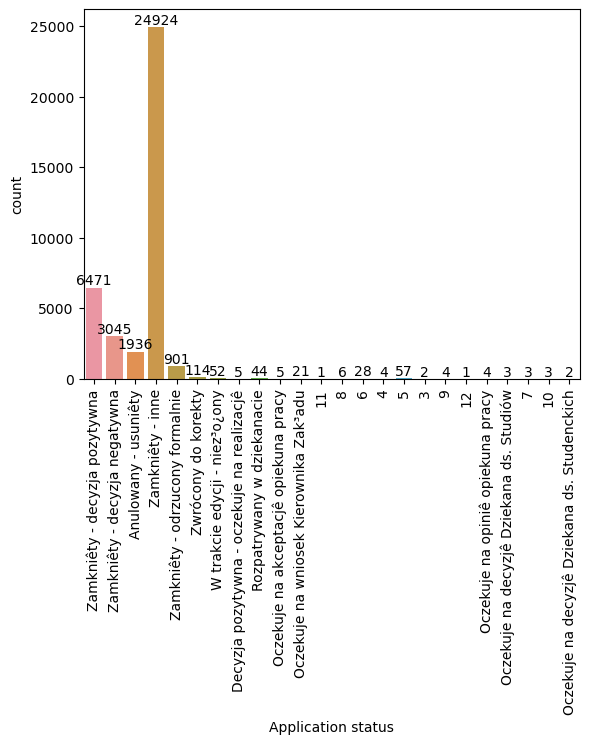

(37636, 43)
(35460, 43)


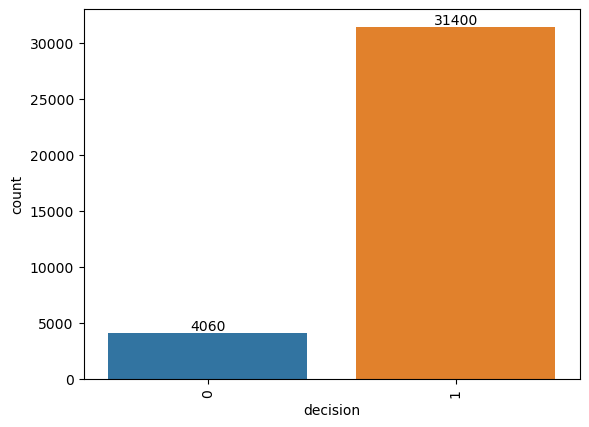

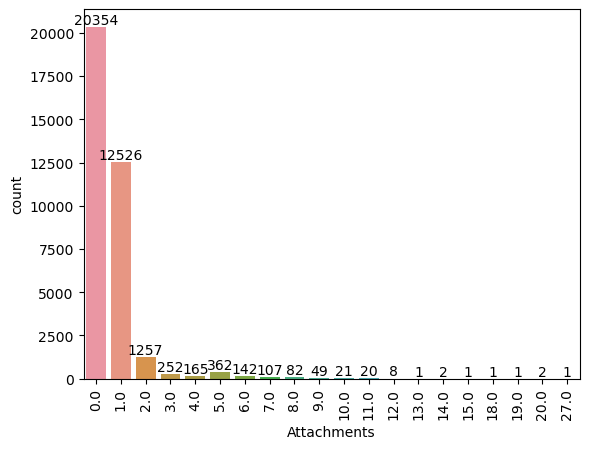

Index(['D', 'Z', 'O'], dtype='object')
Index(['I', 'M', 'E', 'P', 'J', 'D'], dtype='object')
Index(['PL', 'EN', 'S '], dtype='object')
Index(['Model 2,I,D,PL,7 - In¿ynieria  Komputerowa',
       'Model 2,I,Z,PL,8 - Technika Wysokich Napiêæ i Kompatybilnoæ Elektromagnetyczna',
       'Model 2,I,Z,PL,8 - Elektroenergetyka',
       'Model 2,I,D,PL,7 - Elektromechatronika Pojazdów i Maszyny Elektryczne',
       'Model 2,I,D,PL,7 - Technika Wysokich Napiêæ i Kompatybilnoæ Elektromagnetyczna',
       'Model 2,I,D,PL,7 - Elektronika Przemys³owa',
       'Model 2,I,Z,PL,8 - Elektromechatronika Pojazdów i Maszyny Elektryczne',
       'Model 2,I,D,EN,8 - Electrical Engineering',
       'Model 2,I,D,PL,7 - In¿ynieria  Oprogramowania',
       'Model 2,I,D,PL,7 - Systemy wbudowane',
       'Model 2,I,D,PL,7 - Automatyka.',
       'Model 2,I,D,PL,7 - Elektroenergetyka',
       'Model 2,I,Z,PL,8 - Automatyka Przemys³owa',
       'Model 2,M,D,EN,3 - Electrical Engineering',
       'Model 2,I,D,PL,7 

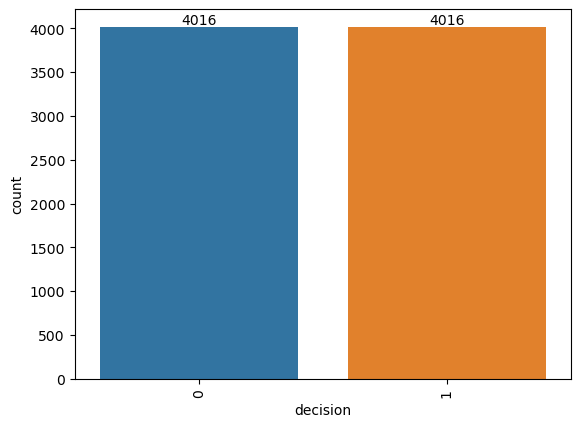

(8032, 29)
(8032,)


In [2]:
%run 40_balance.ipynb

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Train SVC model

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

In [5]:
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')

In [6]:
eclf1 = eclf1.fit(X_train, y_train)

/home/jan/miniconda3/envs/ppda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluation

In [7]:
pred= eclf1.predict(X_test)

In [8]:
from sklearn.metrics import classification_report,confusion_matrix

[[ 490  721]
 [  95 1104]]


<Axes: >

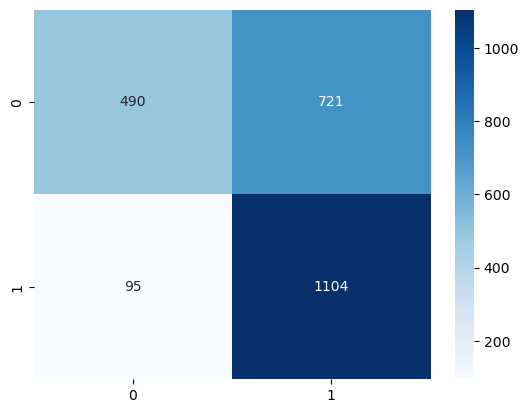

In [9]:
cm = confusion_matrix(y_test,pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')

In [10]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.40      0.55      1211
           1       0.60      0.92      0.73      1199

    accuracy                           0.66      2410
   macro avg       0.72      0.66      0.64      2410
weighted avg       0.72      0.66      0.64      2410

